In [6]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def lj(r, sigma, eps):
    return 4 * eps * ((sigma / r)**12 - (sigma / r)**6)
    
ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = np.linspace(3.5, 6.0, 10)

psi4.set_options({'freeze_core': True})

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)
    
R_data = np.array(Rvals)
E_data = np.array([ecp[R] * psi4.constants.hartree2kcalmol for R in Rvals])


popt, pcov = curve_fit(lj, R_data, E_data, p0=[3.0, 1.0])

sigma_fit, eps_fit = popt

print(f"Fitted sigma: {sigma_fit:.3f} Å")
print(f"Fitted epsilon: {eps_fit:.3f} kcal/mol")

R_fine = np.linspace(min(R_data), max(R_data), 100)
E_fitted = lj(R_fine, *popt)



Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. 

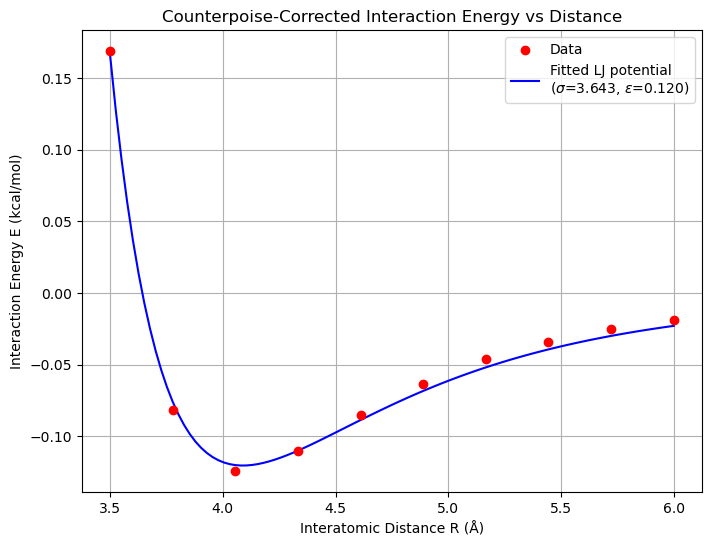

CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.168852
            3.8                        -0.081601
            4.1                        -0.124476
            4.3                        -0.109975
            4.6                        -0.085257
            4.9                        -0.063285
            5.2                        -0.046407
            5.4                        -0.034071
            5.7                        -0.025204
            6.0                        -0.018843


In [10]:

plt.figure(figsize=(8, 6))
plt.scatter(R_data, E_data, color='red', label='Data', zorder=5)
plt.plot(R_fine, E_fitted, color='blue', label=f"Fitted LJ potential\n($\\sigma$={sigma_fit:.3f}, $\\epsilon$={eps_fit:.3f})")
plt.xlabel('Interatomic Distance R (Å)')
plt.ylabel('Interaction Energy E (kcal/mol)')
plt.title('Counterpoise-Corrected Interaction Energy vs Distance')
plt.legend()
plt.grid(True)
plt.savefig('/home/jh9412/HiJihye/comp-lab-class-2024/Week10/Figures/Counterpoise-Corrected Interaction Energy vs Distance.png',dpi=300)
plt.show()

print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print(f"            {R:3.1f}                        {e:1.6f}")
